# Visualisations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

c:\Users\Patricia Avram\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
df_cleaned = pd.read_csv("data/full_data_cleaned.csv")
fraud_entries = pd.read_csv("data/fraudulent_data_cleaned.csv")
non_fraud_entries = pd.read_csv("data/non_fraudulent_data_cleaned.csv")

In [ ]:
# Function for plotting variables distribution from fraud dataset
def plottingColumns(column):
    col = fraud_entries[column] 

    plt.figure(figsize=(12, 6))  
    col.hist(bins=30)

    plt.xlabel('Value')
    plt.ylabel(col.name)
    plt.title(f'Histogram of {col.name}')
    plt.tight_layout()
    plt.show()

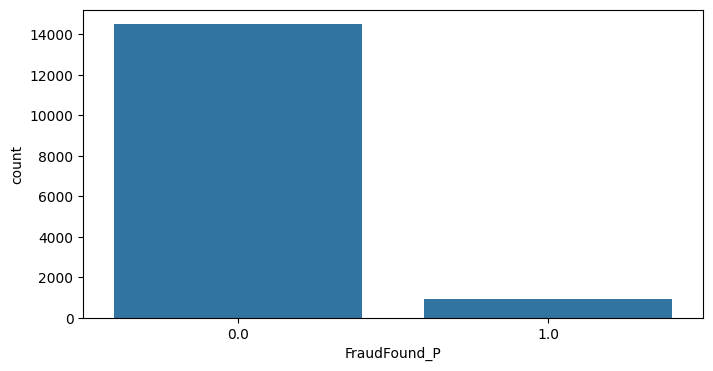

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(x='FraudFound_P', data=df_cleaned)
plt.show()

C:\Users\Patricia Avram\AppData\Local\Temp\ipykernel_6780\3439956281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_fraud = without_fraud_indicator.corr()


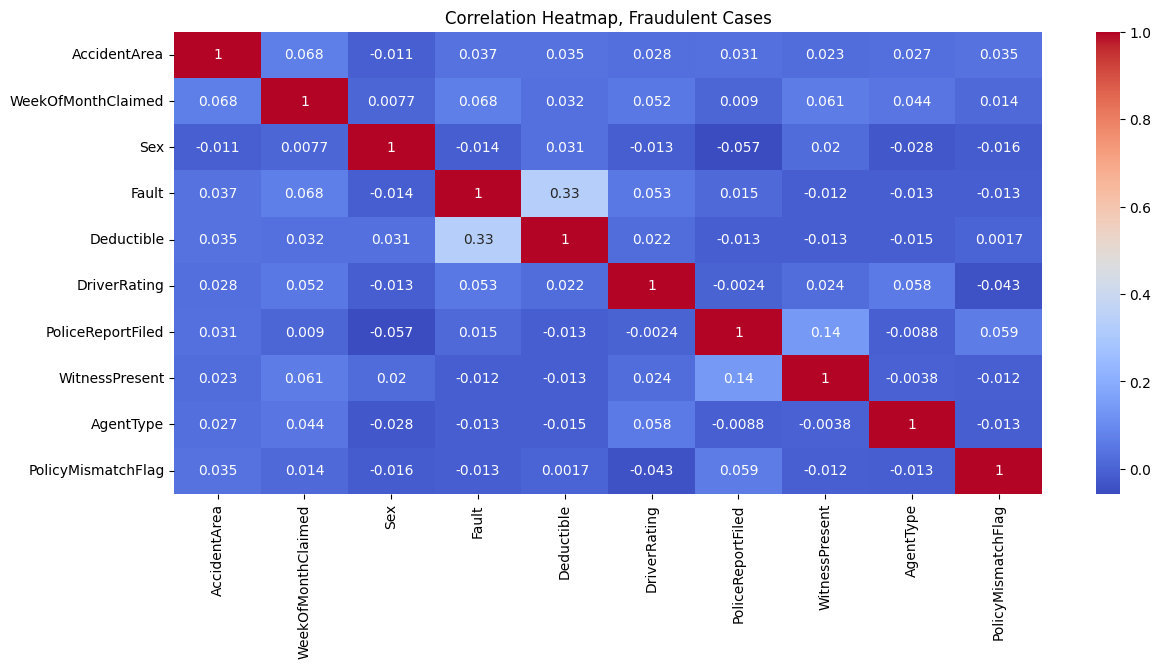

In [23]:
without_fraud_indicator = fraud_entries.drop(columns=["FraudFound_P"])
corr_fraud = without_fraud_indicator.corr()

plt.figure(figsize=(14, 6))   # wider figure
sns.heatmap(corr_fraud, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap, Fraudulent Cases")
plt.show()

In fraudulent claims, higher deductibles are positively correlated with the claimant being at fault. This suggests that individuals who select high-deductible policies may also exhibit riskier driving behavior which created higher at-fault incidents and more incentives for fraud through claim inflation.

Also, the correlation between witness presence and police reports is weaker than in non-fraudulent ones. People who commit fraud tend to avoid police involvement and verifiable witness statements.

C:\Users\Patricia Avram\AppData\Local\Temp\ipykernel_6780\3073674426.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_non_fraud = non_fraud.corr()


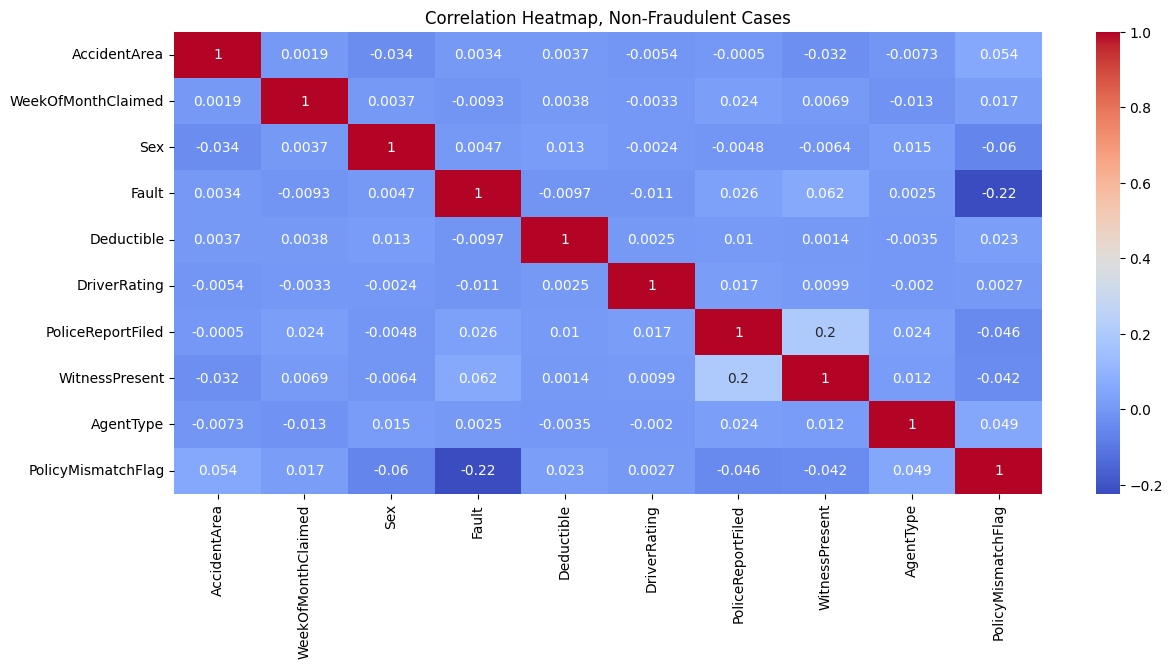

In [24]:
non_fraud = non_fraud_entries.drop(columns=["FraudFound_P"])
corr_non_fraud = non_fraud.corr()

plt.figure(figsize=(14, 6))
sns.heatmap(corr_non_fraud, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap, Non-Fraudulent Cases")
plt.show()

There seems to be a noticeable positive correlation between the presence of a witness and the filing of a police report, which makes sense since people would feel more pressure to file a report to defend their actions if there is a witness present. In the case of fraud, people would be less likely to file a police report, as it could lead to the police detecting the fraud. 

In non-fraudulent claims, we observe a moderate negative correlation between the policyholder being at fault and mismatched policy information. This suggests that mismatches are more common in not-at-fault claims, likely due to administrative errors or incomplete reporting rather than deliberate manipulation. For people that are found to be at-fault, claims tend to have more accurate policy metadata, probably because these claims undergo stricter scrutiny and more thorough verification.


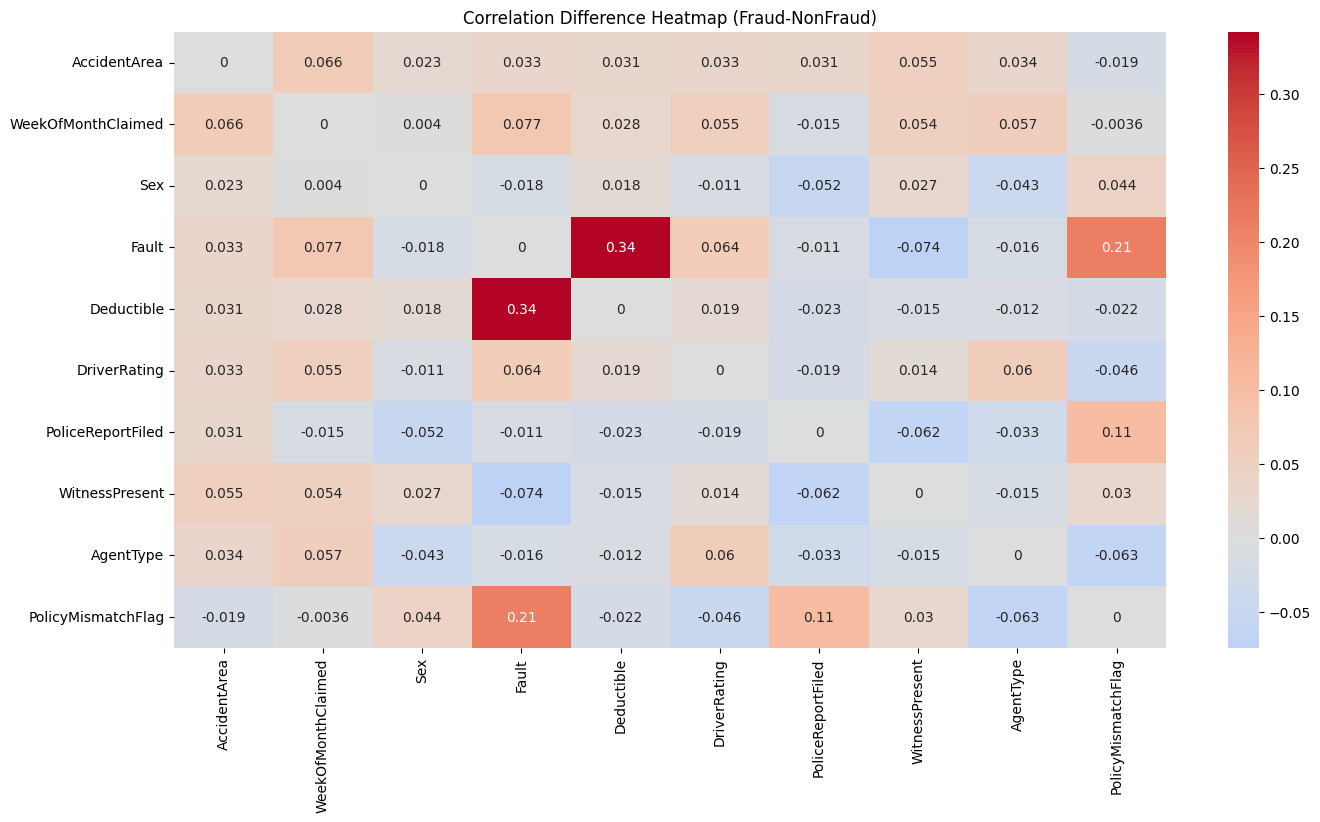

Deductible          Fault                 0.342026
Fault               Deductible            0.342026
PolicyMismatchFlag  Fault                 0.210747
Fault               PolicyMismatchFlag    0.210747
PoliceReportFiled   PolicyMismatchFlag    0.105134
PolicyMismatchFlag  PoliceReportFiled     0.105134
Fault               WeekOfMonthClaimed    0.077007
WeekOfMonthClaimed  Fault                 0.077007
WitnessPresent      Fault                -0.073857
Fault               WitnessPresent       -0.073857
dtype: float64


In [ ]:
corr_diff = corr_fraud - corr_non_fraud

plt.figure(figsize=(16, 8))
sns.heatmap(corr_diff, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Difference Heatmap (Fraud-NonFraud)")
plt.show()

# Sort by absolute difference
diff_sorted = corr_diff.unstack().sort_values(key=lambda x: abs(x), ascending=False)
print(diff_sorted[:10])
